In [1]:
import feather
import numpy as np 
import pandas as pd
from sklearn.preprocessing import (OneHotEncoder,StandardScaler)
from sklearn.pipeline import Pipeline

from sklearn.model_selection import (
    GridSearchCV)

In [2]:
from sklearn.compose import ColumnTransformer

In [3]:
#Modelos a utilizar:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
walmart= feather.read_dataframe('feathers/walmart_wide_train.feather')

In [5]:
walmart

,visit_number,trip_type,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,5.0,999,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,7.0,30,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,8.0,26,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,9.0,8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,10.0,8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,191343.0,25,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,191344.0,22,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,0.0,5,0,0,0,1,0,0,0
95671,191345.0,39,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,191346.0,39,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


features:

In [6]:
X = walmart.drop(['trip_type','visit_number'], axis=1)
#X = walmart.drop(['TripType','VisitNumber'], axis=1)

In [7]:
X

,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,department_description_BOOKS AND MAGAZINES,department_description_BOYS WEAR,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1.0,0.0,5,0,0,0,1,0,0,0
95671,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


In [8]:
y=walmart.iloc[:,1]

In [9]:
y

0        999
1         30
2         26
3          8
4          8
        ... 
95669     25
95670     22
95671     39
95672     39
95673      8
Name: trip_type, Length: 95674, dtype: category
Categories (38, object): ['3', '4', '5', '6', ..., '42', '43', '44', '999']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train

,scan_count,department_description_1-HR PHOTO,department_description_ACCESSORIES,department_description_AUTOMOTIVE,department_description_BAKERY,department_description_BATH AND SHOWER,department_description_BEAUTY,department_description_BEDDING,department_description_BOOKS AND MAGAZINES,department_description_BOYS WEAR,...,department_description_WIRELESS,regreso,variedad,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
90220,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11,0,0,1,0,0,0,0
30817,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14,0,0,0,1,0,0,0
66821,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
12400,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12,0,1,0,0,0,0,0
81126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
73349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
50057,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0
5192,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,1,0,0,0,0


In [12]:
# quité la estandarización porque así sale mejor la evaluación de los modelos
#pero está en otro notebook, por si acaso

# Feature selection

In [12]:
from sklearn.feature_selection import SelectFromModel

In [13]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))

In [ ]:
sel.fit(X_train, y_train)

In [23]:
sel.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False])

In [45]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

21

In [46]:
selected_feat

Index(['DepartmentDescription_BEAUTY',
       'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       'DepartmentDescription_COMM BREAD', 'DepartmentDescription_DAIRY',
       'DepartmentDescription_DSD GROCERY',
       'DepartmentDescription_FINANCIAL SERVICES',
       'DepartmentDescription_FROZEN FOODS',
       'DepartmentDescription_GROCERY DRY GOODS',
       'DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP',
       'DepartmentDescription_HOUSEHOLD PAPER GOODS',
       'DepartmentDescription_IMPULSE MERCHANDISE',
       'DepartmentDescription_INFANT CONSUMABLE HARDLINES',
       'DepartmentDescription_MENS WEAR',
       'DepartmentDescription_PERSONAL CARE',
       'DepartmentDescription_PETS AND SUPPLIES',
       'DepartmentDescription_PHARMACY OTC',
       'DepartmentDescription_PHARMACY RX', 'DepartmentDescription_PRODUCE',
       'DepartmentDescription_SERVICE DELI', 'regreso', 'variedad'],
      dtype='object')

In [ ]:
#Guardar un pickle 

In [20]:
import pickle

In [55]:
selected_feat

Index(['DepartmentDescription_BEAUTY',
       'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       'DepartmentDescription_COMM BREAD', 'DepartmentDescription_DAIRY',
       'DepartmentDescription_DSD GROCERY',
       'DepartmentDescription_FINANCIAL SERVICES',
       'DepartmentDescription_FROZEN FOODS',
       'DepartmentDescription_GROCERY DRY GOODS',
       'DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP',
       'DepartmentDescription_HOUSEHOLD PAPER GOODS',
       'DepartmentDescription_IMPULSE MERCHANDISE',
       'DepartmentDescription_INFANT CONSUMABLE HARDLINES',
       'DepartmentDescription_MENS WEAR',
       'DepartmentDescription_PERSONAL CARE',
       'DepartmentDescription_PETS AND SUPPLIES',
       'DepartmentDescription_PHARMACY OTC',
       'DepartmentDescription_PHARMACY RX', 'DepartmentDescription_PRODUCE',
       'DepartmentDescription_SERVICE DELI', 'regreso', 'variedad'],
      dtype='object')

In [ ]:
#Guarda un pickle: 

In [29]:
pickle.dump( selected_feat, open( "pickles/selected_feat", "wb" ) )

In [ ]:
#Carga el pickle: 

In [ ]:
selected_feat_ok = open("pickles/selected_feat","rb")

In [ ]:
selected_feat_ok = pickle.load(selected_feat_ok)

In [ ]:
selected_feat_ok 

## Otra Feature Selection

In [ ]:
#lo que está comentado no es necesario correrlo porque ya está en un pickle

In [13]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt

In [14]:
#model_fs = ExtraTreesClassifier(n_estimators=500)
#model_fs.fit(X_train,y_train)
#print(model_fs.feature_importances_)

[8.35186672e-02 1.53270428e-03 3.18215649e-03 1.11380315e-02
 1.00881755e-02 6.13797619e-03 1.61728243e-02 5.33348195e-03
 2.40099732e-03 5.40077370e-03 3.52931502e-03 9.08305023e-04
 1.35531219e-02 1.13103726e-02 1.36128640e-02 4.55217097e-04
 1.04620965e-02 2.64001472e-02 4.19595942e-02 8.48180689e-03
 6.64710539e-03 3.66798065e-02 1.58325581e-02 2.11525312e-03
 4.89846910e-03 3.04290021e-02 9.03462679e-03 6.09346298e-06
 7.00331477e-03 1.04898440e-02 5.24492669e-03 2.00977649e-02
 1.52332221e-02 2.29938889e-02 6.62669072e-03 1.71744036e-02
 5.44224554e-03 1.62941155e-03 1.24738897e-02 8.53987267e-04
 9.25678744e-03 1.08149234e-02 1.30506370e-02 4.59426242e-03
 2.29525091e-02 1.04214959e-02 3.18629480e-03 5.34872516e-04
 2.82191930e-04 3.65898415e-03 3.12468970e-02 1.18275140e-02
 3.12177907e-02 1.79854172e-02 1.93396167e-03 1.20195763e-03
 8.43754800e-03 3.00179090e-02 3.11386530e-03 1.04428768e-04
 2.41394721e-02 1.10798676e-03 1.10954682e-02 4.23679508e-03
 9.71178769e-03 1.853091

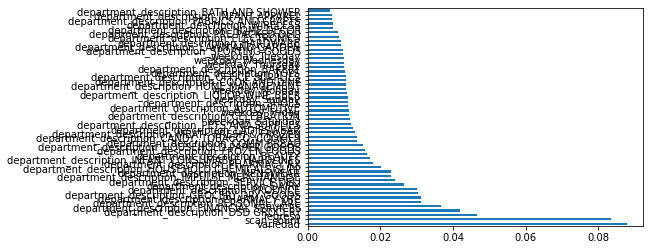

In [15]:
#feat_importances = pd.Series(model_fs.feature_importances_, index=X_train.columns)
#feat_importances.nlargest(50).plot(kind='barh')
#plt.show()

In [16]:
#feat_importances.nlargest(50)

variedad                                              0.087846
scan_count                                            0.083519
regreso                                               0.046532
department_description_DSD GROCERY                    0.041960
department_description_FINANCIAL SERVICES             0.036680
department_description_PERSONAL CARE                  0.031247
department_description_PHARMACY OTC                   0.031218
department_description_GROCERY DRY GOODS              0.030429
department_description_PRODUCE                        0.030018
department_description_DAIRY                          0.026400
department_description_SERVICE DELI                   0.024139
department_description_IMPULSE MERCHANDISE            0.022994
department_description_MENSWEAR                       0.022953
department_description_HOUSEHOLD CHEMICALS/SUPP       0.020098
department_description_PHARMACY RX                    0.017985
department_description_INFANT CONSUMABLE HARDLINES    0

In [17]:
#selected_var = feat_importances.nlargest(50).index

In [12]:
import pickle

In [13]:
#guardamos un pickle

#pickle.dump(selected_var, open("pickles/selected_var", "wb"))

In [14]:
#cargamos el pickle
selected_var = pickle.load(open("pickles/selected_var","rb"))

In [15]:
selected_var

Index(['variedad', 'scan_count', 'regreso',
       'department_description_DSD GROCERY',
       'department_description_FINANCIAL SERVICES',
       'department_description_PERSONAL CARE',
       'department_description_PHARMACY OTC',
       'department_description_GROCERY DRY GOODS',
       'department_description_PRODUCE', 'department_description_DAIRY',
       'department_description_SERVICE DELI',
       'department_description_IMPULSE MERCHANDISE',
       'department_description_MENSWEAR',
       'department_description_HOUSEHOLD CHEMICALS/SUPP',
       'department_description_PHARMACY RX',
       'department_description_INFANT CONSUMABLE HARDLINES',
       'department_description_BEAUTY', 'department_description_FROZEN FOODS',
       'department_description_HOUSEHOLD PAPER GOODS',
       'department_description_COMM BREAD',
       'department_description_CANDY, TOBACCO, COOKIES',
       'department_description_MEAT - FRESH & FROZEN',
       'department_description_LADIESWEAR',
   

## X train y X test after feature selection:

**50 variables**

In [16]:
X_train_fs = X_train[selected_var]

In [17]:
X_test_fs = X_test[selected_var]

**veinte y tantas variables**

In [ ]:
X_train_feat_s = X_train[selected_feat]

In [49]:
X_test_feat_s = X_test[selected_feat]

In [ ]:
#model = models_dict["random_forest"]["model"]

# Modelos

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_fs, y_train)
y_model = model.predict(X_test_fs)

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

Accuracy: 0.646180860403863


In [58]:
pickle.dump( model, open( "pickles/random_forest_21_columns", "wb" ) )

In [ ]:
#no me corre con mil árboles :(, lo voy a hacer con 500
# con 500 árboles y 50 variables: 0.646180860403863

In [ ]:
# Accuracy: 0.5881516785818806 con la seleccion de features de 21 variables.  

In [ ]:
# Con todo el data set nos habia dado accuracy: 0.6539343009931246

### Knn

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
%%time

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train, y_train)
y_model_knn = model_knn.predict(X_test)

CPU times: user 59.1 s, sys: 0 ns, total: 59.1 s
Wall time: 59.2 s


In [20]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_knn)))

Accuracy: 0.650319829424307


In [ ]:
# 10 VECINOS
#accuracy 50 variables: 0.5876499853672812
#accuracy con todas las variables: 0.5976002341235002
# 5 VECINOS
#accuracy con todas las variables: 0.590994606797943, 2 min
# 15 VECINOS
#accuracy con todas las variables: 0.59772565742715, 2 min

#sin estandarizar variedad, 15 vecinos, todas las variables: 0.6305029474476358
#igual pero con la wide limpia: 0.6323842970023831
#igual pero con corrección de menswear e imputación: 0.650319829424307

### SVM

In [17]:
from sklearn import svm

In [32]:
%%time
model_svm = svm.SVC(kernel='linear', probability=True, random_state=0)
model_svm.fit(X_train_fs, y_train)
y_model_svm = model_svm.predict(X_test_fs)

CPU times: user 13min 51s, sys: 515 ms, total: 13min 52s
Wall time: 13min 54s


In [33]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_svm)))

Accuracy: 0.6660813579163009


In [ ]:
#accuracy con todas las variables: 0.6856892010535558, se tardó 25 minutos
#accurCY con 50 variables: 0.6660813579163009, se tardó 13 minutos

### Árbol de Decisiones

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
%%time
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_fs, y_train)
y_model_dt = model_dt.predict(X_test_fs)

CPU times: user 784 ms, sys: 0 ns, total: 784 ms
Wall time: 783 ms


In [37]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_dt)))

Accuracy: 0.5752330783059493


In [ ]:
#accuracy con todas las variables:  0.5939629583176554, se tarda un segundo
# accuracy con 50: 0.5752330783059493, menos d eun segundo

### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
%%time
model_gb = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10)
model_gb.fit(X_train_fs, y_train)
y_model_gb = model_gb.predict(X_test_fs)

CPU times: user 50.5 s, sys: 16 ms, total: 50.6 s
Wall time: 50.6 s


In [41]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_gb)))

Accuracy: 0.6190476190476191


In [ ]:
# accuracy con todas las variables:  0.6311718717337681, 1 minuto
# accuracy con 50: 0.6190476190476191, menos de 1 minuto

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [29]:
%%time
model_lr = LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
model_lr.fit(X_train, y_train)
y_model_lr = model_lr.predict(X_test)

CPU times: user 1min 17s, sys: 26.3 ms, total: 1min 17s
Wall time: 1min 17s


In [30]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_lr)))

Accuracy: 0.6399515029892554


In [ ]:
# con 50 variables: 0.6178351937790041
# con todas: 0.6399515029892554

## Magic Loop

In [22]:
from time import time

In [23]:
from sklearn import metrics
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])
    return metrics.precision_score(y_true, y_pred)

In [24]:
#magic loop, máximo 4 hiper parámetros
#comente random forest porque me odia

In [25]:
def define_hyper_params():
    clfs = {
        #'RF': RandomForestClassifier(n_estimators=100),
        #'KNN': KNeighborsClassifier(n_neighbors=15),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'DT': DecisionTreeClassifier(),
        'LR': LogisticRegression(penalty='l2', C=1e5, solver='liblinear')
        
            }

    grid = { 
        #'RF':{'n_estimators': [1,10,100,500], 'max_depth': [10,25,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        #'KNN' :{'n_neighbors': [5,15,25,50],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']},
        'SVM' :{'C' :[0.00001,0.001,0.1,1],'kernel':['linear', 'rbf']},
        'GB': {'n_estimators': [1,10,100,500], 'learning_rate' : [0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,10,20,50]},
        'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'LR': { 'penalty': ['l1','l2'], 'C': [0.0001,0.001,0.01,0.1,1]}
           }

    return clfs, grid

In [26]:
def magic_loop(models_to_run, clfs, grid, X, y, search = 1):
    for n in range(1, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for index, clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            try:
                if(search):
                    gs = GridSearchCV(clf, parameter_values, cv=5)
                    start = time()
                    y_pred_probs = gs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    y_score = gs.fit(X_train, y_train).decision_function(X_test)
                    print(precision_at_k(y_test, y_pred_probs, 0.05))
                    print("GridSearch time: " + (str)(time() - start))

                else:
                    start = time()
                    rs = RandomizedSearchCV(clf, parameter_values, cv=5)
                    y_pred_probs = rs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    print(precision_at_k(y_test, y_pred_probs, 0.05)) 
                    print("RandomizedSearch time: " + (str)(time() - start))
            except IndexError as e:
                print('Error:', e)
                continue

In [27]:
clfs, grid = define_hyper_params()
#models = ['RF','KNN','SVM','GB','DT','LR']
models = ['SVM','GB','DT','LR']

In [28]:
X_fs = X[selected_var]

In [ ]:
%%time
magic_loop(models, clfs, grid, X_fs, y, search = 1)

SVM


/home/diramtz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
#RandomSearch
#magic_loop(models, clfs, grid, X, y, search = 0)

In [ ]:
#### NO SE SI SIRVE: 

    ## Grid search CV to select best possible model.
    grid_search = GridSearchCV(model,
                               models_dict["random_forest"]["param_grid"],
                               cv=TimeSeriesSplit(n_splits=time_series_splits),
                               scoring=evaluation_metric,
                               return_train_score=True,
                               n_jobs=-1
                               )

    grid_search.fit(X_train, y_train)

    print("\n++ Grid search results:\n")
    print("    ++++ Best parameters: {}".format(grid_search.best_params_))
    print("    ++++ Best estimator: {}".format(grid_search.best_estimator_))
    print("    ++++ Number of features in best estimator: {} \n".format(grid_search.best_estimator_.n_features_))
    print("    ++++ Best estimator score: {}\n".format(grid_search.best_score_))
    print("    ++++ Best estimator oob score: {}\n".format(grid_search.best_estimator_.oob_score_))


    ## Determining model's best estimators
    feature_importance = pd.DataFrame(
        {
            "Importance": grid_search.best_estimator_.feature_importances_,
            "Feature": df_features_prc_cols
        }
    )

In [ ]:
###################
## ML parameters ##
###################

## Models and parameters
models_dict = {

    "random_forest": {
        "model": RandomForestClassifier(
            max_features=6,
            n_estimators=10,
            max_leaf_nodes=10,
            oob_score=True,
            n_jobs=-1,
            random_state=1111
        ),
        "param_grid": {
            "n_estimators": [100, 300, 500, 800],
            "min_samples_leaf": [3, 5, 7],
            "criterion": ['gini']
        }
    },

    "decision_tree": {
        "model": DecisionTreeClassifier(
            random_state=2222
            ),
        "param_grid": {
            'max_depth': [5, 10, 15, None],
            'min_samples_leaf': [3, 5, 7]
        }
    },

}



In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

In [ ]:
def magic_loop(models_dict, df_imp_features_prc, df_labels):
    """
    """


    ## Splitting data in train and test
    X_train, X_test, y_train, y_test = train_test_split(df_imp_features_prc, df_labels, test_size=0.3)


    ##
    models_mloop = {}
    for mdl in models_dict:

        model = models_dict[mdl]["model"]

        grid_search = GridSearchCV(model,
                               models_dict[mdl]["param_grid"],
                               cv=TimeSeriesSplit(n_splits=time_series_splits),
                               scoring=evaluation_metric,
                               return_train_score=True,
                               n_jobs=-1
                               )
        grid_search.fit(X_train, y_train)

        models_mloop[mdl] = {
            "best_estimator": grid_search.best_estimator_,
            "best_estimator_score": grid_search.best_score_
        }

    sel_model = models_mloop[select_best_model(models_mloop)]["best_estimator"]


    return sel_model, X_train, X_test, y_train, y_test


In [ ]:
## Testing model with test data set.
def best_model_predict_test(sel_model, X_test):
    """
    Testing model with test data set.
        args:
            sel_model (sklearn model): best model obtained from magic loop.
            X_test (numpy array): dataset to test best model.
        returns:
            test_predict_labs (array): labels predicted by best model.
            test_predict_scores (array): probabilities related with classification by best model.
    """

    ## Predict test labels and probabilities with selected model.
    test_predict_labs = sel_model.predict(X_test)
    test_predict_scores = sel_model.predict_proba(X_test)

    return test_predict_labs, test_predict_scores